# Model 200 basicVs

Charlie Shobe

This model has variable source area stream power of the form:
$$\frac{d\eta}{dt}=-KA_{eff}^mS^n$$
where
$$A_{eff} = A e^{( -\alpha S / A)} = A R_r$$.
It also has linear hillslope diffusion:
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

This is a test of the variable source area component. So, at steady state, the landscape will  fall ABOVE the line described by the basic stream power rule:
$$S=\left(\frac{U}{KA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$).

In [1]:
from terrainbento import BasicVs
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 0.01,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output',
          'recharge_rate': 0.01,
          'initial_soil_thickness' : 1.0,
          'K_hydraulic_conductivity' : 15.
}

In [3]:
#instantiate and establish topo error tolerance
vs = BasicVs(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = vs.grid.at_node['topographic__elevation'][vs.grid.core_nodes]
    vs.run_one_step(dt)
    post_topo = vs.grid.at_node['topographic__elevation'][vs.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print('MAX: ', max(abs(pre_topo - post_topo)))
        print('MEAN: ', np.average(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
MAX:  0.111624096593
MEAN:  0.00489213765307
1000
MAX:  0.0116473313919
MEAN:  0.00438970019222
2000
MAX:  0.00937821245055
MEAN:  0.00414758865047
3000
MAX:  0.00641941934267
MEAN:  0.00393342256829
4000
MAX:  0.00789758486527
MEAN:  0.00375283590599
5000
MAX:  0.0096207535748
MEAN:  0.00358730208126
6000
MAX:  0.00603537285739
MEAN:  0.00344265292772
7000
MAX:  0.00627823526038
MEAN:  0.00333036466518
8000
MAX:  0.00690074099023
MEAN:  0.00323786819444
9000
MAX:  0.00682671861048
MEAN:  0.00316074790683
10000
MAX:  0.00795597362341
MEAN:  0.00308755933305
11000
MAX:  0.00732436493241
MEAN:  0.00301987406061
12000
MAX:  0.00801767005023
MEAN:  0.00295520790126
13000
MAX:  0.00782903194931
MEAN:  0.00289452189397
14000
MAX:  0.00917793106859
MEAN:  0.00283746803234
15000
MAX:  0.00874575527726
MEAN:  0.0027825840018
16000
MAX:  0.0078612637435
MEAN:  0.00273205695385
17000
MAX:  0.00978824078063
MEAN:  0.00268536676029
18000
MAX:  0.00946064833198
MEAN:  0.0026400493119
19000
MAX:  0

KeyboardInterrupt: 

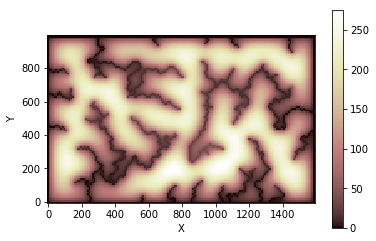

In [5]:
%matplotlib inline
imshow_grid(vs.grid, 'topographic__elevation')

0.274395219444


(1e-06, 10.0)

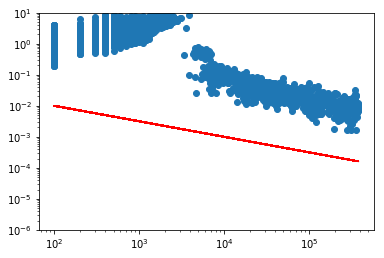

In [6]:
print(vs.grid.at_node['topographic__steepest_slope'][235])
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], vs.grid.at_node['topographic__steepest_slope'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)])
plt.plot(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], (0.0005 / 0.005)*np.power(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], -0.5), c='r')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.000001, 10.0)

In [28]:
area_change = vs.eff_area[vs.grid.core_nodes] / vs.grid.at_node['drainage_area'][vs.grid.core_nodes]
area_change[np.isnan(area_change)] = 0
print(vs.eff_area[vs.grid.core_nodes][0:300])
print(vs.grid.at_node['drainage_area'][vs.grid.core_nodes][0:300])
print(vs.grid.at_node['topographic__steepest_slope'][vs.grid.core_nodes][0:300])


#imshow_grid(vs.grid, area_change)
#print area_change.mean()

sovera = vs.grid.at_node['topographic__steepest_slope'][vs.grid.core_nodes]/vs.grid.at_node['drainage_area'][vs.grid.core_nodes]
#sovera[np.isnan(sovera)] = 0
print(sovera[0:300])
#imshow_grid(vs.grid, sovera)
#print vs.eff_area[vs.grid.core_nodes][0:1000]
print(vs.sat_param)

[  7.91632798e-12   3.43638905e-18   3.25687119e-29   3.78403558e-33
   3.86518723e-32   1.34050622e-31   5.17207158e-32   6.31980356e-31
   1.22254618e-29   1.98721245e-32   5.76254201e-16   2.33221883e-31
   2.65578851e-24   2.63330793e-13   6.15648044e+03   2.89078637e-07
   3.65290376e+02   1.51925382e-14   1.57629600e-24   1.36751429e-27
   3.19742778e-24   9.40261023e-18   5.67447374e-16   2.85246323e-15
   3.24891824e+05   3.69040132e-13   2.77555681e-24   4.59823498e-29
   4.81799755e-31   1.01026982e-24   3.62516756e+03   5.81031376e-13
   2.40203269e-22   2.36464472e-19   2.93649729e+03   1.58834034e-19
   4.99147228e-28   1.28547199e-29   1.13943611e-26   6.55545955e-21
   2.60898705e-17   4.23022207e-18   7.21400844e-12   6.34567101e+03
   5.82629872e-21   1.00325334e-22   3.32437579e-13   6.83980751e+02
   1.10259324e-09   2.33396040e-29   1.73753774e-15   1.64742894e-32
   3.62388322e-11   3.75271269e+02   3.36279925e+01   1.59761672e+04
   8.51636049e-14   8.88996330e-27

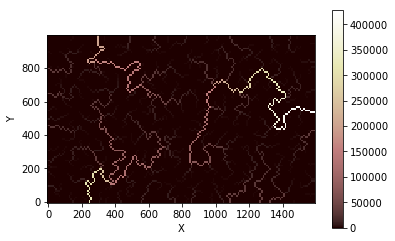

In [9]:
imshow_grid(vs.grid, 'drainage_area')

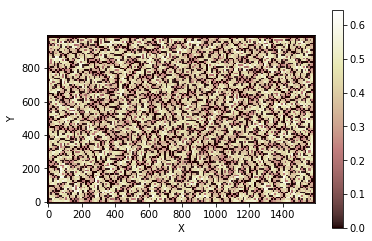

In [10]:
imshow_grid(vs.grid, 'topographic__steepest_slope')

False
False


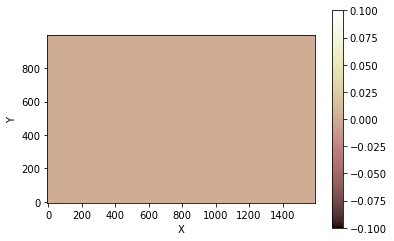

In [11]:
print(np.any(vs.grid.at_node['is_pit'][vs.grid.core_nodes]))
print(np.any(np.isnan(vs.grid.at_node['topographic__elevation'])))
imshow_grid(vs.grid, 'is_pit')

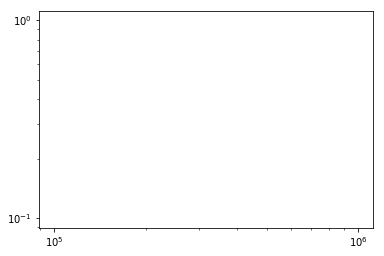

In [12]:
plt.scatter(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], vs.grid.at_node['topographic__steepest_slope'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)])
plt.xscale('log')
plt.yscale('log')

calc slope predicted by Aeff, then plot both A-S and Aeff-S relationships. Also plot the data (A-S), with diffusion turned on.

main text:
cubic
VSA
rock-till


### STEADY STATE PLOT: 
-one line for detachment-limited S-A relationship

-one line for S-Aeff relationship (i.e., what slope is predicted by Aeff?)

-then plot the S-A data from the run with diffusion turned on

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in power


(0.0001, 1000)

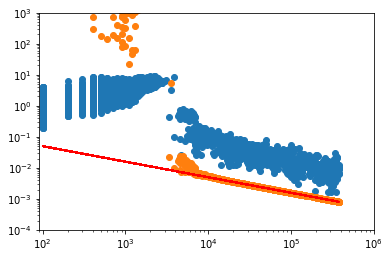

In [11]:
#first: the data
plt.scatter(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], vs.grid.at_node['topographic__steepest_slope'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)])

#second: the detachment-limited slope-area relationship
plt.plot(vs.grid.at_node['drainage_area'][vs.grid.core_nodes], (0.0005 / 0.001) *np.power(vs.grid.at_node['drainage_area'][vs.grid.core_nodes],-0.5), c='r')

#third: calculate the slope predicted by Aeff
slope_by_aeff = (0.0005 / 0.001) * np.power(vs.eff_area, -0.5)
#print len(slope_by_aeff[vs.grid.at_node['drainage_area'][vs.grid.core_nodes]<=1000])
#print len((0.0005 / 0.005) *np.power(vs.grid.at_node['drainage_area'][vs.grid.core_nodes],-0.5)[vs.grid.at_node['drainage_area'][vs.grid.core_nodes]<=1000])

#print slope_by_aeff[vs.grid.at_node['drainage_area'][vs.grid.core_nodes]<=1000]# /( (0.0005 / 0.005) *np.power(vs.grid.at_node['drainage_area'][vs.grid.core_nodes],-0.5)[vs.grid.at_node['drainage_area'][vs.grid.core_nodes]<=1000])


#plt.scatter(vs.eff_area[vs.grid.core_nodes], slope_by_aeff)

plt.scatter(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)], slope_by_aeff[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)])

plt.xscale('log')
plt.yscale('log')
plt.xlim(90, 1000000)
plt.ylim(0.0001, 1000)

In [39]:
print(min(vs.grid.at_node['drainage_area'][vs.grid.core_nodes]))
print(max(vs.grid.at_node['drainage_area'][vs.grid.core_nodes]))
print(min(vs.eff_area[vs.grid.core_nodes]))
print(max(vs.eff_area[vs.grid.core_nodes]))

print(min(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))
print(np.mean(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))
print(max(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))

print(min(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)] / vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))
print(np.mean(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)] / vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))
print(max(vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)] / vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)]))


print(min(slope_by_aeff)
print(max(slope_by_aeff)
print(min(vs.grid.at_node['topographic__steepest_slope'][vs.grid.core_nodes]))
print(max(vs.grid.at_node['topographic__steepest_slope'][vs.grid.core_nodes]))

100.0
427400.0
1.22908190202e-40
427393.380451
1.22908190202e-40
6453.14005589
427291.897985
1.22908190202e-42
0.230290879432
0.999989330218
0.000152981061811
9.02006335798e+18
0.000276528791367
0.643348709575


(0.5, 10)

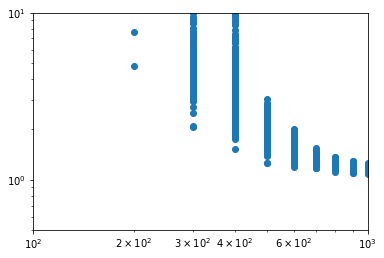

In [59]:
plt.scatter(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)],vs.grid.at_node['drainage_area'][(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)] / vs.eff_area[(vs.grid.node_x > 20)&(vs.grid.node_x < 1580)&(vs.grid.node_y >20)&(vs.grid.node_y<980)])
plt.xscale('log')
plt.yscale('log')

plt.xlim(100, 1000)
plt.ylim(0.5, 10)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in power


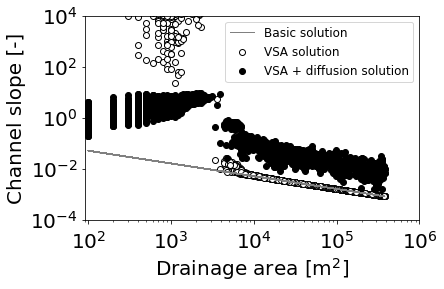

In [35]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = vs.grid.at_node['drainage_area'][(vs.grid.node_x > 10)&(vs.grid.node_x < 1580)&(vs.grid.node_y >10)&(vs.grid.node_y<980)]
slope_array = vs.grid.at_node['topographic__steepest_slope'][(vs.grid.node_x > 10)&(vs.grid.node_x < 1580)&(vs.grid.node_y >10)&(vs.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.5 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field
analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)

#plot the slope predicted by the effective area
slope_by_aeff = (0.0005 / 0.001) * np.power(vs.eff_area, -0.5)
plt.scatter(vs.grid.at_node['drainage_area'][(vs.grid.node_x > 10)&(vs.grid.node_x < 1580)&(vs.grid.node_y >10)&(vs.grid.node_y<980)], 
            slope_by_aeff[(vs.grid.node_x > 10)&(vs.grid.node_x < 1580)&(vs.grid.node_y >10)&(vs.grid.node_y<980)],
           label = 'VSA solution',
           marker='o', edgecolor='0', color='1')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'VSA + diffusion solution') #plot HA data


#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Basic solution')

#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 1*10**6)
slope_area.set_ylim(1e-4, 1e4)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('vsa_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

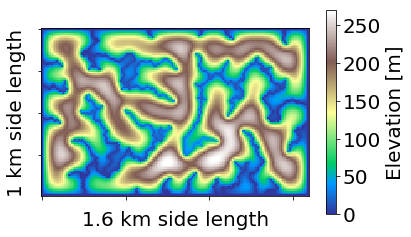

In [36]:
##MAKE TOPO FIGURE
#define 'topo'
topo = vs.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 270.0)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('vsa_topo.eps',bbox_inches='tight', dpi=300)

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


NameError: name 'vs' is not defined